<a href="https://colab.research.google.com/github/stepsbtw/Statistics-Inference-AI-and-ML/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All machine Learning Algorithms follow a certain pipeline.

DATA:
-  Define Database
- PreProcess the Data
- Choose your Features (X)
- Add the Labels (Y)

Machine Learning Algorithm
- Hypothesis Representation (Inductive Bias)
- Loss Function
- Parameter Fitting (Learning)

Hypothesis => The model itself
A hypothesis is a function PARAMETRIZED by the (Theta Parameter : what we want to optmize)

In a supervised algorithm, we already have Labels and Features, so we only evaluate how well that model is predicting.

How come? Loss Function. Calculates a certain "distance" from the optimal. Compare it with other Hypothesis, choose the best one.

Optimizing the Hypothesis - Loss Function parameter Fitting.

LINEAR REGRESSION
- Inductive Bias : Linear, that is, the hypothesis is represented by a line, a plane, even a hyperplane.

- Loss Function : Mean Squared Error

- Fitting : Gradient Descent

For Machine Learning, we will use Scikit-Learn Framework.
Which already implements multiple kinds of Machine Learning Algorithms.
( Classification, Regression, Clustering, Model Selection, Reduction of Dimensionality, Preprocessing )

Representing the Hypothesis:
```
(.,.) => dot product
X => vector of features => dim(X) = dim(Θ)-1, so add 1 column.
x0 = 1
Θ => vector of parameters
```
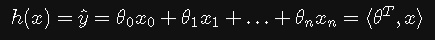


For this implementation we will be using Synthetic Data.

# Generating the data :
We will use the case of Area x Cost of a property.

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42) # setting a seed for repeating the results.

# my feature is only the area
area = np.random.uniform(500,4000,100) # this creates a distribution(start,finish,quantity) for the random elements.
'''
  this distribution could be lots of different things.
    np.random.normal()
    np.random.poisson()
    np.random.exponential()
  and the list goes on...
'''

# Now we define the relationship between Area and Price (for generating the data.)
base_price = 50000
price_per_area = 300

# generate the labels (targets) with some noise.
noise = np.random.normal(0, 100000, 100) # just to add some randomness

total_price = base_price + (price_per_area * area) + noise

###Lets check how is our data:

In [ ]:
import matplotlib.pyplot as plt

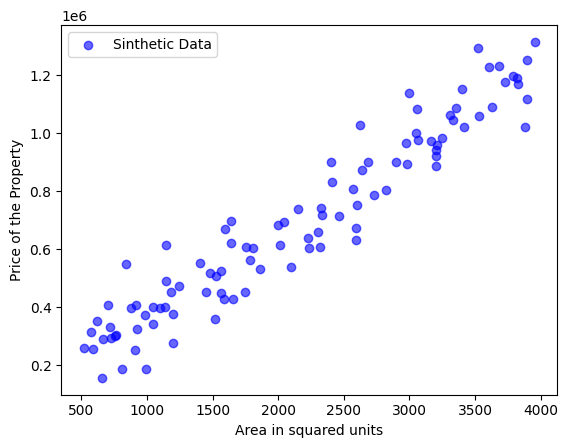

In [ ]:
# lets plot the data points.

plt.scatter(area, total_price, color="blue", label="Sinthetic Data", alpha = 0.6)
plt.xlabel("Area in squared units")
plt.ylabel("Price of the Property")
plt.legend() # it does automatically

plt.show()

###That is a Nice indicator of using Linear Regression.
We could use the Formula of the NORMAL EQUATION to generate the Model ANALICALLY. Usually, this approach is not that viable because Inverting Matrices is kinda pricy.

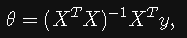

This formula optimizes the line analytically.
- Inverting a n x n Matrix is O(n^3)
- This formula is derived from the assumption of a QUADRATIC error function.

In [ ]:
print(area.shape)

X = np.column_stack((np.ones(area.shape[0]), area)) # adding the "ones" column for x0
# y = np.transpose(total_price)
y = total_price.reshape(-1,1) # column vector

# NORMAL EQUATION find the parameters!
theta = (np.linalg.inv(X.transpose().dot(X))).dot(X.transpose().dot(y))

#print(theta)
print(f"Theta_0 : {theta[0][0]} constant (where intersects)")
print(f"Theta_1 : {theta[1][0]} inclination (slope) of the line")

(100,)
Theta_0 : 78077.80471357683 constant (where intersects)
Theta_1 : 286.86362208219845 inclination (slope) of the line


## Now we use the trained model to predict !

In [ ]:
def predict(area):
  return theta[0][0] + (theta[1][0] * area)

# example:
test = area[50]
prediction = predict(test)
print(f"Preco previsto : {prediction}, Preco real: {total_price[50]}")

Preco previsto : 1194994.5695798409, Preco real: 1119010.2266397176


## Cool! Now how to measure the accuracy?